<a href="https://colab.research.google.com/github/YOKESH-P-S/Data_Exploration_and_Analysis/blob/main/Movies_Correlation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

df=pd.read_csv('movies.csv')

'''Data Cleaning (DC)
'''
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

# DC1 We found some cells missing information and we will drop them.

df = pd.read_csv('movies.csv')
df = df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [58]:
pd.set_option('display.max_rows', 10)

In [59]:
pd.read_csv('movies.csv')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [60]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
             ...  
country     object
budget       int64
gross        int64
company     object
runtime      int64
Length: 15, dtype: object

In [61]:
# DC2 Converting float to integer values wherever required
df['votes'] = df['votes'].astype('int')
df['budget'] = df['budget'].astype('int')
df['gross'] = df['gross'].astype('int')
df['runtime'] = df['runtime'].astype('int')

print(df.dtypes)
# print(df)

name        object
rating      object
genre       object
year         int64
released    object
             ...  
country     object
budget       int64
gross        int64
company     object
runtime      int64
Length: 15, dtype: object


In [66]:
# DC3 Checking whether released year is same in the cloumns "released" and "year"
import re

def check_release_year(df):
  for index, row in df.iterrows():
    # Extract year from "released" column using regex
    match = re.search(r'\b\d{4}\b', row['released'])
    if match:
      released_year = int(match.group())
      if released_year != row['year']:
        row

check_release_year(df)


In [63]:
# Top grossing movies
df_sorted_gross = df.sort_values(by=['gross'], ascending=False)
print(df_sorted_gross)
pd.set_option('display.max_rows', 10)

                                            name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             directo

In [64]:
#Top rated movies
df_sorted_score = df.sort_values(by=['score'], ascending=False)
(df_sorted_score)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Leonard Part 6,PG,Action,1987,"December 18, 1987 (United States)",2.2,7900,Paul Weiland,Jonathan Reynolds,Bill Cosby,United States,24000000,4615255,Columbia Pictures,85
4412,From Justin to Kelly,PG,Comedy,2003,"June 20, 2003 (United States)",2.1,25000,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000,4928883,19 Entertainment,81
4342,House of the Dead,R,Action,2003,"October 10, 2003 (United States)",2.1,36000,Uwe Boll,Mark A. Altman,Jonathan Cherry,Germany,12000000,13818181,Boll Kino Beteiligungs GmbH & Co. KG,90
4594,Superbabies: Baby Geniuses 2,PG,Comedy,2004,"August 27, 2004 (United States)",1.9,30000,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000,9448644,ApolloMedia Distribution,88


In [ ]:
for index, row in df.iterrows():
  if row['budget'] > row['gross']:
    print(row)

In [43]:
duplicates = df[df.duplicated(subset='name', keep=False)]
print(duplicates)
df['name'].drop_duplicates().sort_values(ascending=True)

                     name rating      genre  year  \
5         Friday the 13th      R     Horror  1980   
18                The Fog      R     Horror  1980   
46             The Island      R     Action  1980   
99    Clash of the Titans     PG     Action  1981   
113          Halloween II      R     Horror  1981   
...                   ...    ...        ...   ...   
7511             Serenity      R      Drama  2019   
7521         Pet Sematary      R     Horror  2019   
7526              The Kid      R  Biography  2019   
7529         Child's Play      R      Drama  2019   
7536                Shaft      R     Action  2019   

                              released  score   votes            director  \
5          May 9, 1980 (United States)    6.4  123000  Sean S. Cunningham   
18    February 8, 1980 (United States)    6.8   66000      John Carpenter   
46       June 13, 1980 (United States)    5.3    3900     Michael Ritchie   
99       June 12, 1981 (United States)    6.9   42000  

1099       *batteries not included
6906           10 Cloverfield Lane
3452    10 Things I Hate About You
393                 10 to Midnight
5344                     10,000 BC
                   ...            
3503                      eXistenZ
4083                           xXx
7112    xXx: Return of Xander Cage
4761       xXx: State of the Union
4722                      Æon Flux
Name: name, Length: 5336, dtype: object

In [44]:
# DC4 Removing Duplicates
df = df.drop_duplicates(subset='name')
duplicates = df[df.duplicated(subset='name', keep=False)]
print(duplicates)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


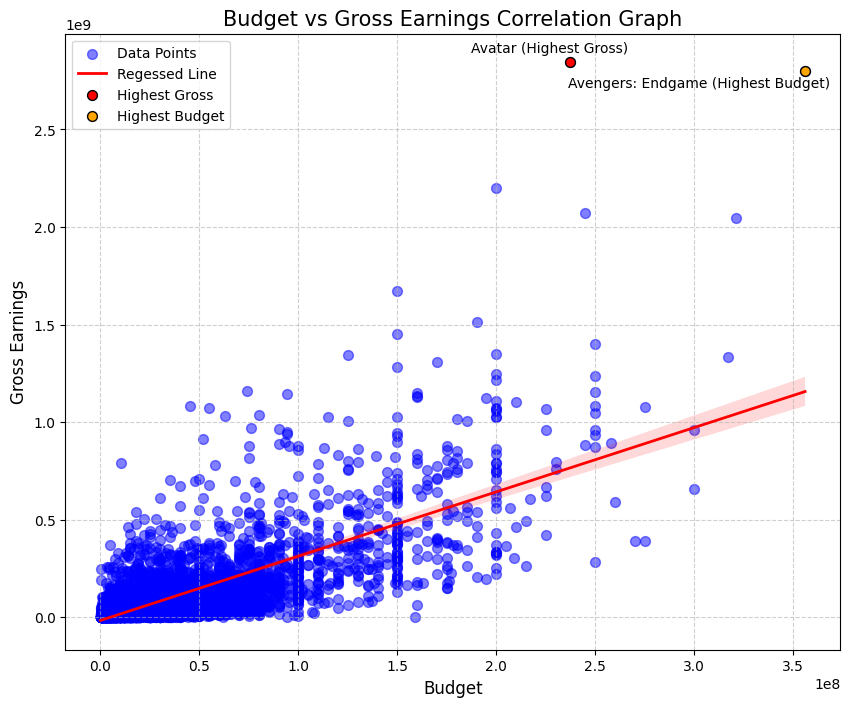

In [45]:
# Correlations of gross with budget
plt.figure(figsize=(10, 8))
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5, s=50, c='blue', marker='o', label='Data Points')

plt.title('Budget vs Gross Earnings Correlation Graph', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)

# Adding regression line to show the trend between gross and budget
sns.regplot(x='budget', y='gross', data=df, scatter=False, color='red', line_kws={'linewidth': 2}, label='Regessed Line')

plt.xlabel('Budget', fontsize=12)
plt.ylabel('Gross Earnings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Highest Grossing and High Budget movies are highlighted
max_gross = df[df['gross'] == df['gross'].max()]
for index, row in max_gross.iterrows():
    plt.annotate(f"{row['name']} (Highest Gross)", xy=(row['budget'], row['gross']),
                 xytext=(row['budget']-5*1e7, row['gross'] +5*1e7))
plt.scatter(x=max_gross['budget'], y=max_gross['gross'], color='red', s=50, edgecolor='k', label='Highest Gross')


max_bud = df[df['budget'] == df['budget'].max()]
for index, row in max_bud.iterrows():
    plt.annotate(f"{row['name']} (Highest Budget)", xy=(row['budget'], row['gross']),
                 xytext=(row['budget']-1.2*1e8, row['gross'] -8*1e7))
plt.scatter(x=max_bud['budget'], y=max_bud['gross'], color='orange', s=50, edgecolor='k', label='Highest Budget')

plt.legend()
plt.show()

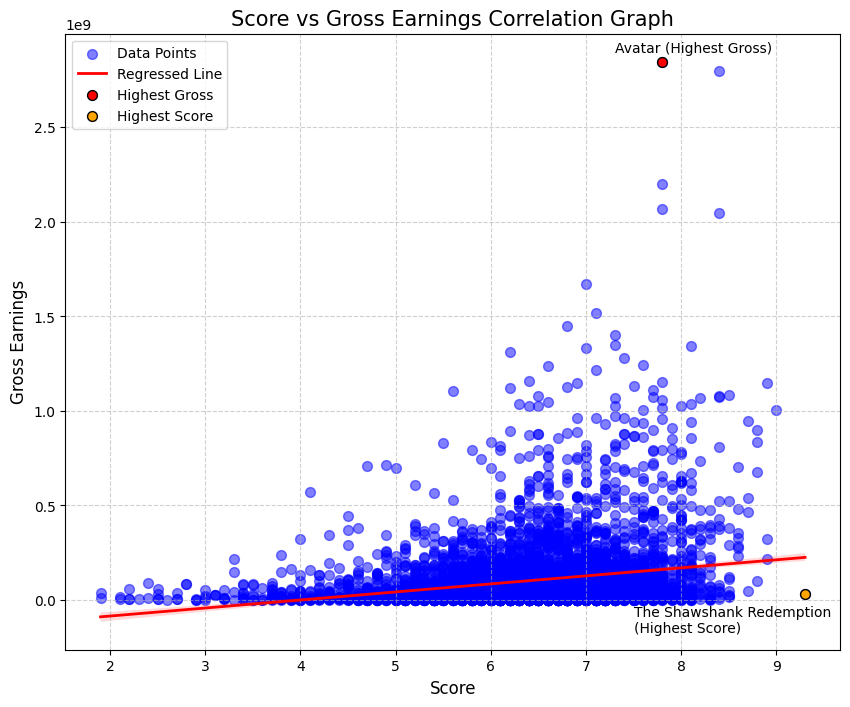

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['score'], y=df['gross'], alpha=0.5, s=50, c='blue', marker='o', label='Data Points')

plt.title('Score vs Gross Earnings Correlation Graph', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)

# Adding regression line to show the trend between gross and score
sns.regplot(x='score', y='gross', data=df, scatter=False, color='red', line_kws={'linewidth': 2}, label='Regressed Line')

plt.xlabel('Score', fontsize=12)
plt.ylabel('Gross Earnings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Highest Grossing and High Score movies are highlighted
max_gross = df[df['gross'] == df['gross'].max()]
for index, row in max_gross.iterrows():
    plt.annotate(f"{row['name']} (Highest Gross)", xy=(row['score'], row['gross']),
                 xytext=(row['score']-0.5, row['gross'] +5*1e7))
plt.scatter(x=max_gross['score'], y=max_gross['gross'], color='red', s=50, edgecolor='k', label='Highest Gross')

max_score = df[df['score'] == df['score'].max()]
for index, row in max_score.iterrows():
    plt.annotate(f"{row['name']}\n(Highest Score)", xy=(row['score'], row['gross']),
                 xytext=(row['score']-1.8, row['gross'] -20*1e7))
plt.scatter(x=max_score['score'], y=max_score['gross'], color='orange', s=50, edgecolor='k', label='Highest Score')

plt.legend()
plt.show()

In [47]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix, "\n")

high_threshold = 0.6
low_threshold = 0.1

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

masked_corr = correlation_matrix.mask(mask)

high_corr_pairs = masked_corr[masked_corr >= high_threshold].stack()
print("Highly correlated pairs (>= 0.7):")
print(high_corr_pairs)

low_corr_pairs = masked_corr[(masked_corr <= low_threshold) & (masked_corr != 0)].stack()
print("\nLowly correlated pairs (<= 0.3):")
print(low_corr_pairs)


             year     score     votes    budget     gross   runtime
year     1.000000  0.061236  0.207542  0.326118  0.271863  0.075414
score    0.061236  1.000000  0.473250  0.071325  0.222235  0.413459
votes    0.207542  0.473250  1.000000  0.438567  0.618162  0.348798
budget   0.326118  0.071325  0.438567  1.000000  0.737723  0.317912
gross    0.271863  0.222235  0.618162  0.737723  1.000000  0.276189
runtime  0.075414  0.413459  0.348798  0.317912  0.276189  1.000000 

Highly correlated pairs (>= 0.7):
gross  votes     0.618162
       budget    0.737723
dtype: float64

Lowly correlated pairs (<= 0.3):
score    year     0.061236
budget   score    0.071325
runtime  year     0.075414
dtype: float64


genre
Biography    7.093506
Drama        6.729025
Crime        6.694072
Animation    6.689377
Mystery      6.670588
               ...   
Comedy       6.190020
Fantasy      6.048780
Thriller     5.983333
Western      5.950000
Horror       5.845679
Name: score, Length: 15, dtype: float64


<ipython-input-48-2efec0c58e3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_score_relation.values, y=genre_score_relation.index, palette='viridis')


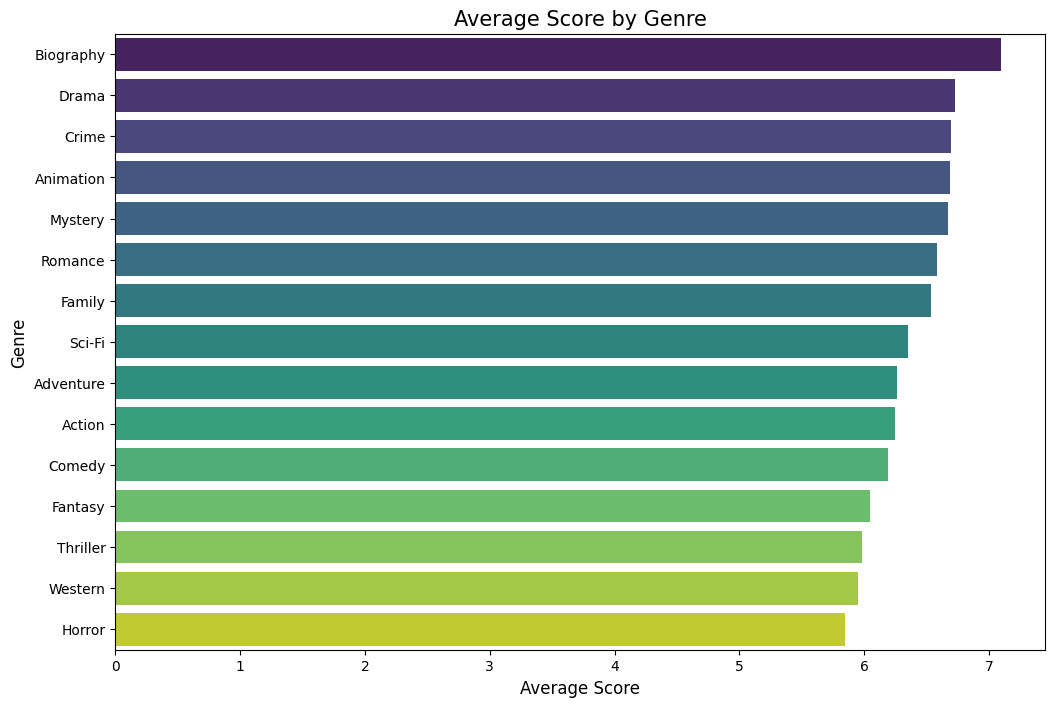

genre
Animation    2.751080e+08
Family       2.699660e+08
Action       1.665380e+08
Adventure    1.278814e+08
Mystery      1.178877e+08
                 ...     
Thriller     4.051563e+07
Fantasy      3.987870e+07
Sci-Fi       3.761010e+07
Romance      3.357538e+07
Western      1.001294e+07
Name: gross, Length: 15, dtype: float64


<ipython-input-48-2efec0c58e3f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross_relation.values, y=genre_gross_relation.index, palette='Reds')


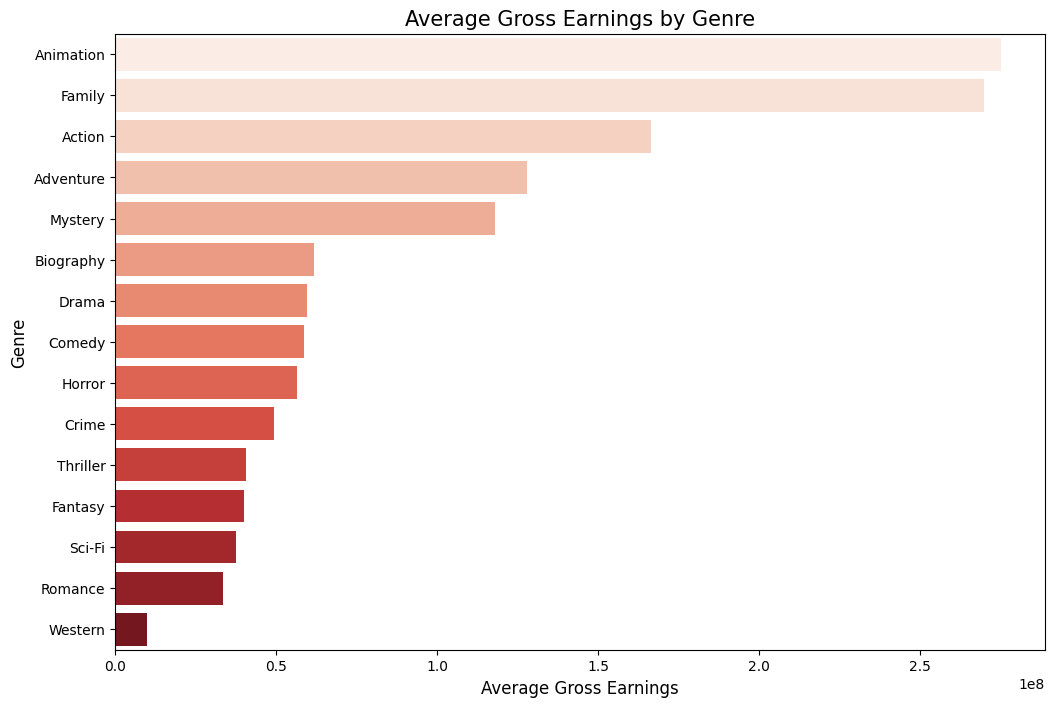

genre
Animation    7.581527e+07
Action       5.776160e+07
Adventure    4.514018e+07
Mystery      3.187647e+07
Biography    2.549467e+07
                 ...     
Fantasy      1.722439e+07
Family       1.483333e+07
Horror       1.295295e+07
Thriller     1.266667e+07
Western      1.050000e+07
Name: budget, Length: 15, dtype: float64


<ipython-input-48-2efec0c58e3f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_budget_relation.values, y=genre_budget_relation.index, palette='Blues')


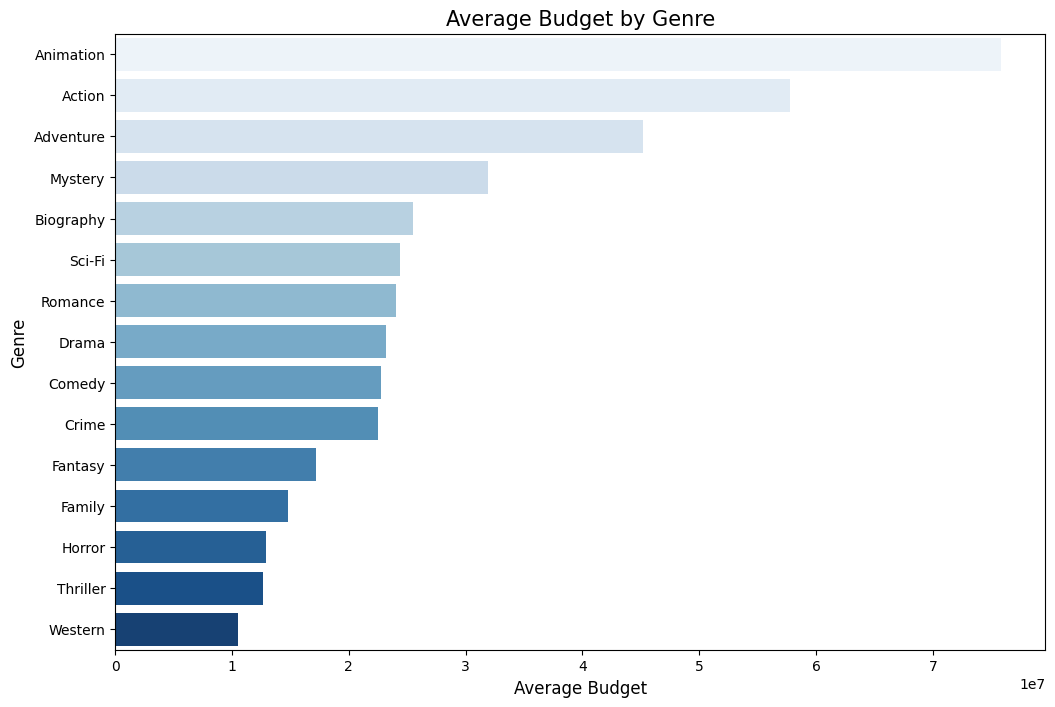

In [48]:
# Relation between Genre and Score of the film by bar plot
genre_score_relation = df.groupby('genre')['score'].mean().sort_values(ascending=False)
print(genre_score_relation)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_score_relation.values, y=genre_score_relation.index, palette='viridis')

plt.title('Average Score by Genre', fontsize=15)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Relation between Genre and gross of the film by bar plot
genre_gross_relation = df.groupby('genre')['gross'].mean().sort_values(ascending=False)
print(genre_gross_relation)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_gross_relation.values, y=genre_gross_relation.index, palette='Reds')

plt.title('Average Gross Earnings by Genre', fontsize=15)
plt.xlabel('Average Gross Earnings', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Relation between Genre and budget of the film by bar plot
genre_budget_relation = df.groupby('genre')['budget'].mean().sort_values(ascending=False)
print(genre_budget_relation)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_budget_relation.values, y=genre_budget_relation.index, palette='Blues')

plt.title('Average Budget by Genre', fontsize=15)
plt.xlabel('Average Budget', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [49]:
# Finding order of genres based on high rating, high grossing, and low budget
df_score = genre_score_relation.to_frame(name='score')
df_gross = genre_gross_relation.to_frame(name='gross')
df_budget = genre_budget_relation.to_frame(name='budget')

df_merged = df_score.merge(df_gross, left_index=True, right_index=True)
df_merged = df_merged.merge(df_budget, left_index=True, right_index=True)

df_merged = df_merged.sort_values(by=['score', 'gross', 'budget'], ascending=[False, False, True])

print("Order of genres based on high rating, high grossing, and low budget:")
print(df_merged)

Order of genres based on high rating, high grossing, and low budget:
              score         gross        budget
genre                                          
Biography  7.093506  6.176490e+07  2.549467e+07
Drama      6.729025  5.955130e+07  2.315528e+07
Crime      6.694072  4.919066e+07  2.247953e+07
Animation  6.689377  2.751080e+08  7.581527e+07
Mystery    6.670588  1.178877e+08  3.187647e+07
...             ...           ...           ...
Comedy     6.190020  5.877907e+07  2.277274e+07
Fantasy    6.048780  3.987870e+07  1.722439e+07
Thriller   5.983333  4.051563e+07  1.266667e+07
Western    5.950000  1.001294e+07  1.050000e+07
Horror     5.845679  5.643379e+07  1.295295e+07

[15 rows x 3 columns]


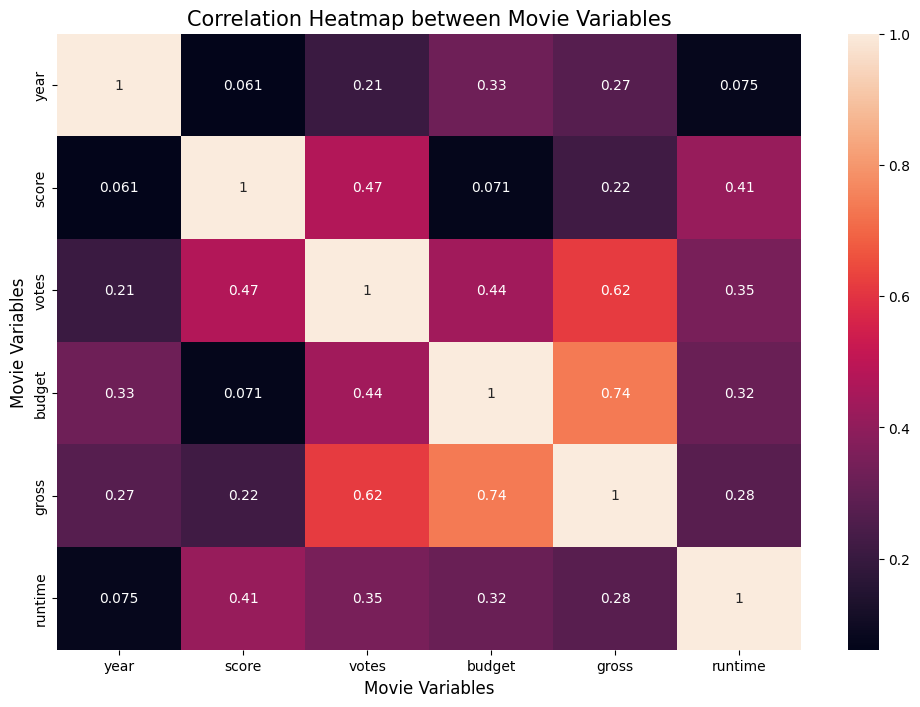

In [50]:
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap between Movie Variables', fontsize=15)
plt.xlabel('Movie Variables', fontsize=12)
plt.ylabel('Movie Variables', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

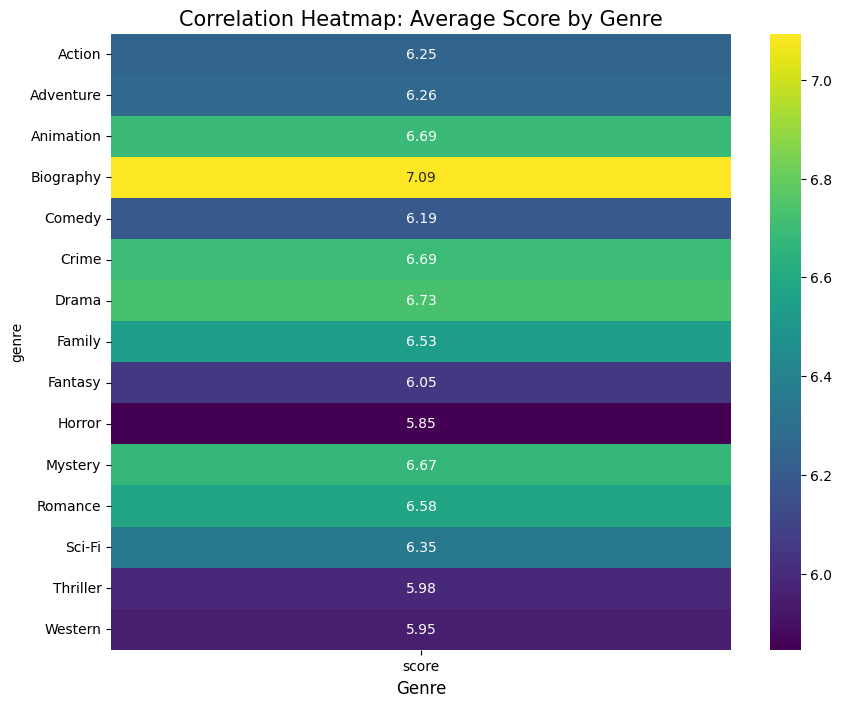

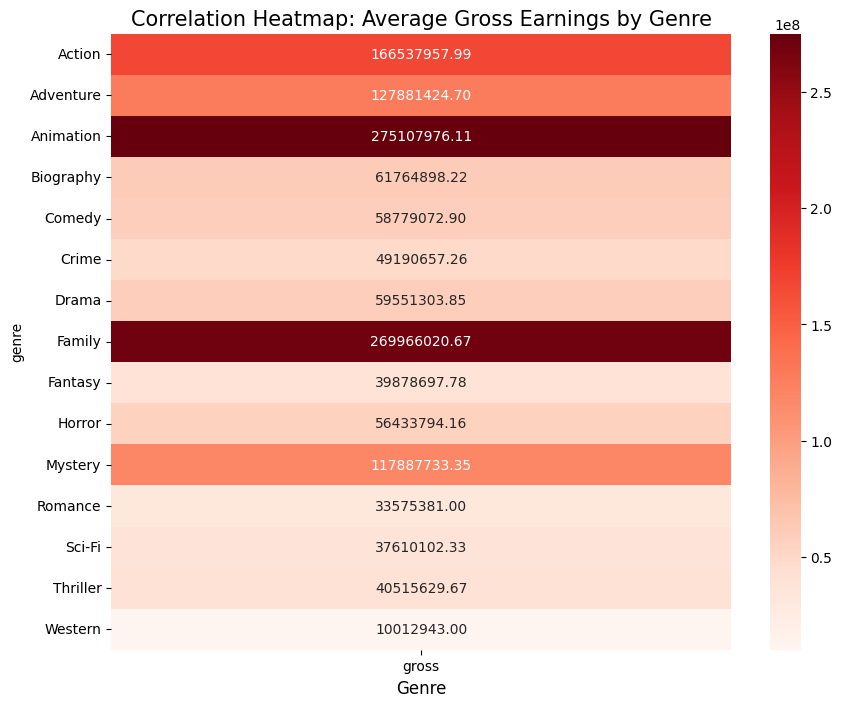

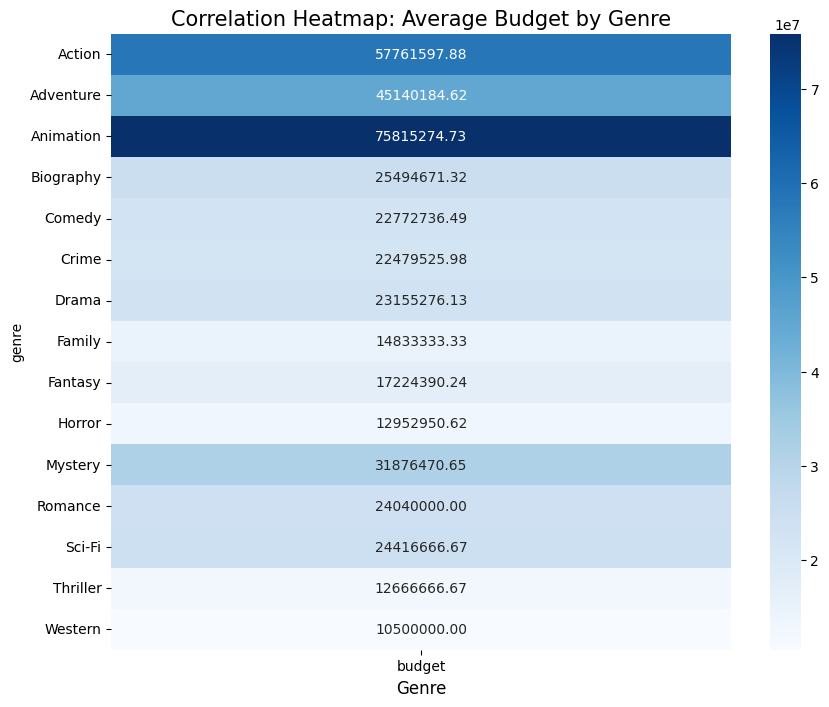

In [51]:
# Heat maps for Genre with Score, Gross and Budget
genre_score_corr = df.groupby('genre')['score'].mean()
genre_gross_corr = df.groupby('genre')['gross'].mean()
genre_budget_corr = df.groupby('genre')['budget'].mean()

genre_score_corr = genre_score_corr.to_frame(name='score')
genre_gross_corr = genre_gross_corr.to_frame(name='gross')
genre_budget_corr = genre_budget_corr.to_frame(name='budget')

plt.figure(figsize=(10, 8))
sns.heatmap(genre_score_corr, annot=True, cmap='viridis', fmt='.2f')

plt.title('Correlation Heatmap: Average Score by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(genre_gross_corr, annot=True, cmap='Reds', fmt='.2f')

plt.title('Correlation Heatmap: Average Gross Earnings by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(genre_budget_corr, annot=True, cmap='Blues', fmt='.2f')

plt.title('Correlation Heatmap: Average Budget by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [52]:
# Top 20 countries and company by total gross
top_countries = df.groupby('country')[["gross"]].sum()
top_countries=top_countries.sort_values(by=['gross'], ascending=False).head(20)
print(top_countries)

top_companies = df.groupby('company')[["gross"]].sum()
top_companies=top_companies.sort_values(by=['gross'], ascending=False).head(20)
print(top_companies)

                       gross
country                     
United States   456600529601
United Kingdom   42888610457
France            6565278619
New Zealand       6278354563
China             5994804685
...                      ...
Malta              352794081
Denmark            304697629
Mexico             298086281
Taiwan             287551110
South Korea        267985927

[20 rows x 1 columns]
                                     gross
company                                   
Warner Bros.                   53402787586
Universal Pictures             50762944661
Columbia Pictures              40870093831
Twentieth Century Fox          39333826704
Paramount Pictures             38995978170
...                                    ...
Fox 2000 Pictures               7097630564
Walt Disney Animation Studios   6751509051
Lionsgate                       5986995110
TriStar Pictures                5405033354
Screen Gems                     4009650928

[20 rows x 1 columns]


In [53]:
# Convert all object type columns to categorical and then to numerical codes for having correlation between every column
df_numeric = df.copy()
df_numeric = df_numeric.apply(lambda col: col.astype('category').cat.codes if col.dtype == 'object' else col)
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1297,8.4,927000,1779,2809,696,46,19000000,46998772,1416,146
1,3929,6,1,1980,1120,5.8,65000,1566,1147,214,47,4500000,58853106,449,104
2,3641,4,0,1980,1352,8.7,1200000,752,1800,1149,47,18000000,538375067,939,124
3,204,4,4,1980,1120,7.7,221000,884,1400,1465,47,3500000,83453539,1100,88
4,732,6,4,1980,1163,7.3,108000,715,347,271,47,6000000,39846344,1075,98


In [54]:
# Correlation matrix for every column and Heat map for the same
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

              name    rating     genre      year  released     score  \
name      1.000000 -0.029775  0.011915  0.025221 -0.006524  0.014977   
rating   -0.029775  1.000000  0.148543  0.018993  0.018745  0.068714   
genre     0.011915  0.148543  1.000000 -0.075050  0.020174  0.039223   
year      0.025221  0.018993 -0.075050  1.000000 -0.000740  0.061236   
released -0.006524  0.018745  0.020174 -0.000740  1.000000  0.045525   
...            ...       ...       ...       ...       ...       ...   
country  -0.025491  0.009236 -0.008524 -0.068017 -0.014850 -0.043140   
budget    0.023097 -0.202192 -0.366326  0.326118  0.024285  0.071325   
gross     0.004959 -0.178963 -0.246023  0.271863  0.009682  0.222235   
company   0.023055 -0.093193 -0.070841 -0.011337 -0.002003  0.024070   
runtime   0.010925  0.144582 -0.055838  0.075414  0.009972  0.413459   

             votes  director    writer      star   country    budget  \
name      0.012862  0.016134  0.018693 -0.009025 -0.025491  0.0

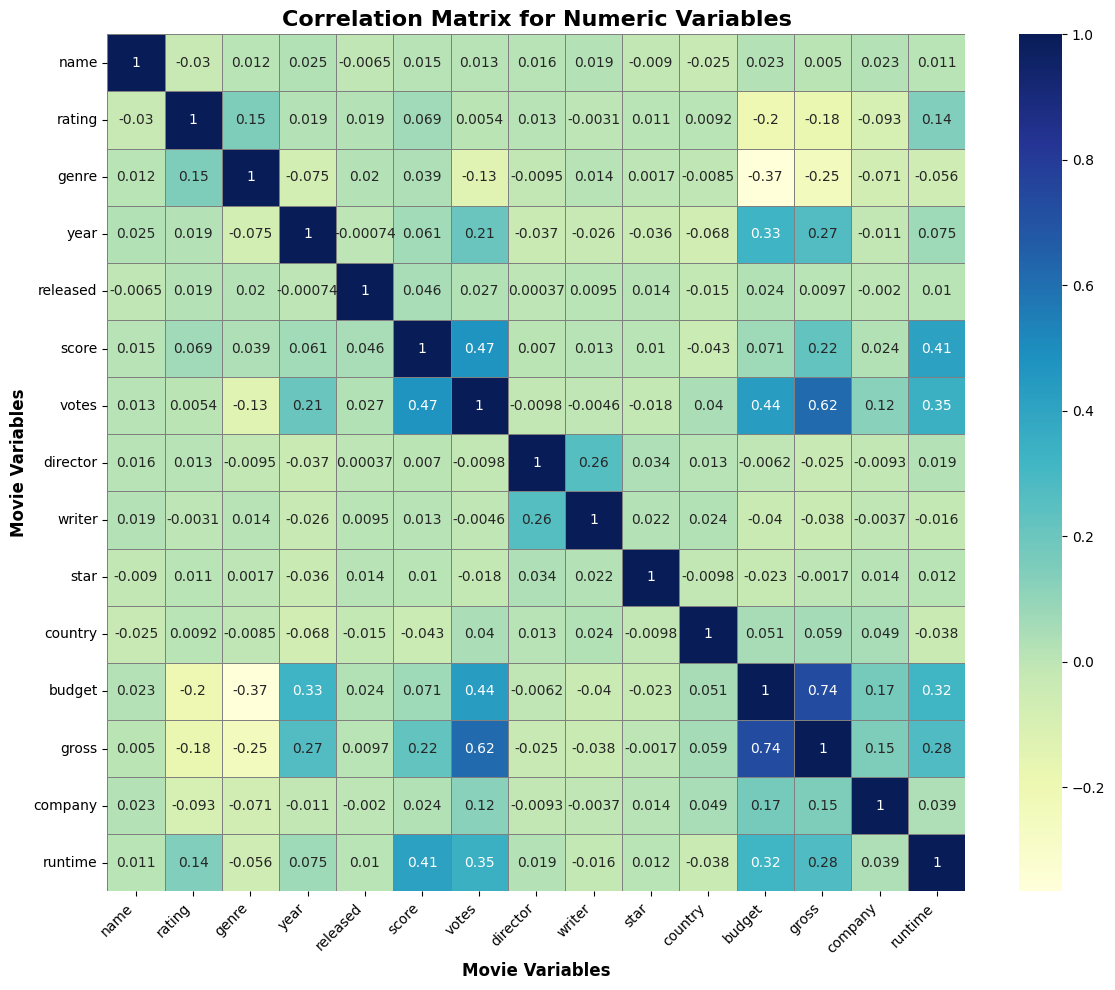

In [55]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title("Correlation Matrix for Numeric Variables", fontsize=16, fontweight='bold')  # Bold title with increased font size
plt.xlabel("Movie Variables", fontsize=12, fontweight='bold')
plt.ylabel("Movie Variables", fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [56]:
pd.set_option('display.max_rows', 210)
correlation_mat = df_numeric.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs_df = pd.DataFrame(corr_pairs, columns=['correlation']).reset_index()
corr_pairs_df.columns = ['Feature1', 'Feature2', 'Correlation']

sorted_corr_pairs = corr_pairs_df.sort_values(by=['Feature1', 'Correlation'], ascending=[True, False])
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs['Feature1'] != sorted_corr_pairs['Feature2']]

sorted_corr_pairs.head(None)

,Feature1,Feature2,Correlation
177,budget,gross,0.737723
171,budget,votes,0.438567
168,budget,year,0.326118
179,budget,runtime,0.317912
178,budget,company,0.169634
170,budget,score,0.071325
175,budget,country,0.051289
169,budget,released,0.024285
165,budget,name,0.023097
172,budget,director,-0.006229


In [57]:
# Finding Highly and lowly correlated Variables of Movies
unique_pairs = set()

def make_sorted_pair(row):
    return tuple(sorted((row['Feature1'], row['Feature2'])))

sorted_corr_pairs['Pair'] = sorted_corr_pairs.apply(make_sorted_pair, axis=1)
unique_sorted_corr_pairs = sorted_corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')

unique_sorted_corr_pairs = unique_sorted_corr_pairs.sort_values(by=['Feature1', 'Correlation'], ascending=[True, False])

high_threshold = 0.4
low_threshold = -0.1

high_correlated = unique_sorted_corr_pairs[unique_sorted_corr_pairs['Correlation'] >= high_threshold].sort_values(by=['Correlation'], ascending=False)

low_correlated = unique_sorted_corr_pairs[unique_sorted_corr_pairs['Correlation'] <= low_threshold].sort_values(by=['Correlation'], ascending=True)

print("Highly Correlated Features:")
print(high_correlated)

print("\nLowly Correlated Features:")
print(low_correlated)

Highly Correlated Features:
    Feature1 Feature2  Correlation
177   budget    gross     0.737723
186    gross    votes     0.618162
81     score    votes     0.473250
171   budget    votes     0.438567
215  runtime    score     0.413459

Lowly Correlated Features:
    Feature1 Feature2  Correlation
167   budget    genre    -0.366326
42     genre    gross    -0.246023
166   budget   rating    -0.202192
181    gross   rating    -0.178963
36     genre    votes    -0.134223
